# DEA accredited projects analysis 2019-2025

## Aims of the project
- Quantify the number of projects approved under the DEA over time
- Qunatify the different datasets requested for these projects 
- Quantify the growth in use of ADR UK flagship datasets over time
- Compare the uptake of different flagship datasets

## Steps 
(All code available on [github](https://github.com/balintstewart77/ADR_DEA_project))
- Scrape data from public register for projects approved under the DEA from [UK Statistics Authority website](https://uksa.statisticsauthority.gov.uk/digitaleconomyact-research-statistics/better-useofdata-for-research-information-for-researchers/list-of-accredited-researchers-and-research-projects-under-the-research-strand-of-the-digital-economy-act/)
- Filter our projects approved under the  Statistics and Registration Service Act 2007 (SRSA 2007) (which is a gateway limited to research for purely statistical purposes), leaving only projects approved under the Digital Economy Act (2017)
- Clean the data: sort out irregular date formatting, standardise dataset labels
- Create visualisations of the number of projects approved under the DEA:
    - show the most popular datasets requested in these projects.
- Subset the data for ADR UK flagship datasets:
    - some flagship datasets such as MoJ-DfE linkage missing, as this is not accessed under the DEA but a separate agreement 
    - data truncated to end of Q1 2025 (as don't yet have all the data for Q2 2025)
    - datasets sometimes aggregated into 'collections' (e.g. Data First and Wage and Employment Dynamics)
- Create visualisations of access requests for ADR UK flagship datasets:
    - Count of access requests for each flagship dataset collection by quarter 
    - Cumulative counts of access requests for each flagship collection by quarter
    - Compounded growth rate for different flagship collections
    - Summary tables showing this data in Markdown

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
df = pd.read_csv('C:/Users/balin/Desktop/ADR_DEA_project/data/dea_accredited_projects.csv')

In [342]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [343]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              1
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [344]:
missing_researchers = df[df['Researchers'].isna()]

In [345]:
missing_datasets = df[df['Datasets Used'].isna()]

In [346]:
# Drop rows with missing datasets used
df = df.dropna(subset=['Datasets Used'])

In [347]:
df.head()

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act (2017),Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,10/25/2019
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act (2017),Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,10/25/2019
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act (2017),Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,10/14/2019
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,10/14/2019
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act (2017),Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,11/19/2019


In [348]:
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act (2017)                                                                                                                                                                                                                                                       1023
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021                                                                                                                                                              98
Digital Economy Act 2017                                                                                                                                                                                                                                                           18
Statistics and Registration Services Act 2007 (SRSA) - Approved Researcher Gateway: added data after 9 September 2021s Act 2007 (SRSA) - Approved Research

In [349]:
# Clean Legal Basis column by removing SRSA rows
df = df[~df['Legal Basis'].str.contains('SRSA', na=False)]
# tidy up DEA labels
df['Legal Basis'] = df['Legal Basis'].str.replace('Digital Economy Act (2017)', 'Digital Economy Act 2017')
df['Legal Basis'].value_counts()

Legal Basis
Digital Economy Act 2017    1041
Name: count, dtype: int64

- Over 1000 projects have been approved under the DEA between 2019 and 2025, applying for access to use an overall total of >2800 datasets 

In [350]:
df.isna().sum()

Project ID                 0
Title                      0
Researchers                2
Legal Basis                0
Datasets Used              0
Secure Research Service    0
Accreditation Date         0
dtype: int64

In [351]:
problematic_dates = df[pd.isna(pd.to_datetime(df['Accreditation Date'], errors='coerce'))]
print(problematic_dates['Accreditation Date'].unique())

['2020-06-11' '2020-12-07' '2021-11-02' '2021-09-14' '2021-09-24'
 '2021-09-17' '2021-10-05' '2021-10-13' '2021-10-26' '2021-10-12'
 '2021-12-10' '2021-03-15' '2023-01-18' '2023-03-06' '2023-03-09'
 '2023-01-03' '2023-04-05' '2023-01-30' '2023-01-17' '2023-04-19'
 '2023-01-20' '2023-02-03' '2023-01-19' '2023-03-02' '2023-03-05'
 '2023-03-21' '2023-04-11' '2023-03-31' '2023-01-11' '2023-03-07'
 '2023-04-04' '2023-02-10' '2023-01-04' '2023-03-20' '2023-01-23'
 '2023-03-03' '2023-02-16' '2023-02-07' '2023-03-23' '2023-02-13'
 '2023-02-24' '2023-04-18' '2023-02-15' '2023-01-22' '2023-03-27'
 '2023-02-22' '2023-01-06' '2023-04-13' '2023-01-13' '2023-01-16'
 '2023-02-02' '2023-03-08' '2023-04-06' '2023-03-24' '2023-03-30'
 '2023-05-02' '2023-05-09' '2023-05-24' '2023-06-02' '2023-06-07'
 '2023-06-13' '2023-06-19' '2023-06-20' '2023-06-22' '2023-05-12'
 '2023-06-05' '13/07/2023' '28/07/2023' '31/07/2023' '17/08/2023'
 '18/08/2023' '30/08/2023' '18/09/2023' '19/09/2023' '20/09/2023'
 '27/09/20

In [352]:
def parse_mixed_dates(date_str):
    """Parse dates that could be in YYYY-MM-DD or DD/MM/YYYY format"""
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Try ISO format first (YYYY-MM-DD)
    if '-' in date_str:
        try:
            return pd.to_datetime(date_str, format='%Y-%m-%d')
        except:
            pass
    
    # Try DD/MM/YYYY format
    if '/' in date_str:
        try:
            return pd.to_datetime(date_str, format='%d/%m/%Y')
        except:
            pass
    
    # Fallback to pandas inference
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT

# Apply the custom parser
df['Accreditation Date'] = df['Accreditation Date'].apply(parse_mixed_dates)

# Create quarter and year columns
df['Accreditation Date Quarter'] = df['Accreditation Date'].dt.to_period('Q')
df['Accreditation Date Year'] = df['Accreditation Date'].dt.year
df['quarter_date'] = df['Accreditation Date Quarter'].dt.to_timestamp(how='start')
df['Quarter Label'] = df['Accreditation Date Quarter'].apply(
    lambda p: f"Q{p.quarter} {p.year}" if pd.notna(p) else None
)

# Check for any remaining problematic dates
remaining_nans = df[df['Accreditation Date'].isna()]
print(f"Remaining NaN dates: {len(remaining_nans)}")
if len(remaining_nans) > 0:
    print("Original values that couldn't be parsed:")
    print(remaining_nans['Accreditation Date'].unique())

Remaining NaN dates: 0


In [353]:
df.isna().sum()

Project ID                    0
Title                         0
Researchers                   2
Legal Basis                   0
Datasets Used                 0
Secure Research Service       0
Accreditation Date            0
Accreditation Date Quarter    0
Accreditation Date Year       0
quarter_date                  0
Quarter Label                 0
dtype: int64

In [354]:
# Dataset has single entry in 2019Q1, likely a typo (rest of data starts from 2019Q4), fix manually
df.loc[16, 'Accreditation Date Quarter'] = '2019Q4'

In [355]:
import re

def extract_datasets(row):
    """
    Extract dataset names from the 'Datasets Used' column.
    Handles multiple data sources and newlines, but doesn't filter values.
    """
    if pd.isna(row) or row == "":
        return []
    
    # Replace newlines and normalize other separators
    processed = row.replace("\n", ";").replace("\\n", ";")
    
    results = []
    
    # Split by semicolons to handle multiple data sources
    for entry in processed.split(";"):
        entry = entry.strip()
        if not entry:
            continue
        
        # Handle the case with or without a data source (colon)
        if ":" in entry:
            # Split only on the first colon
            parts = entry.split(":", 1)
            datasets = parts[1].strip()
            
            # Skip if there's nothing after the colon
            if not datasets:
                continue
        else:
            datasets = entry
        
        # Split by commas and process each dataset
        for ds in datasets.split(","):
            ds = ds.strip()
            
            # Only skip empty strings
            if not ds:
                continue
            
            results.append(ds)
    
    return results

In [356]:
# lowercase the datasets used column
df["datasets_clean"] = df["Datasets Used"].str.lower()

# apply the function to create a list of dataset names
df["dataset_list"] = df["datasets_clean"].apply(lambda x: extract_datasets(x) if pd.notnull(x) else [])

# explode the dataset list to one dataset per row
df_exploded = df.explode("dataset_list")



In [357]:
df_exploded[df_exploded['Datasets Used'].str.contains("PAYE")]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list
1032,2024/239,Uncovering Patterns and Policy Implications of...,"Darja Reuschke, University of Birmingham",Digital Economy Act 2017,"Office for National Statistics, HM Revenue & C...",Office for National Statistics Secure Research...,2024-12-16,2024Q4,2024,2024-10-01,Q4 2024,"office for national statistics, hm revenue & c...",annual survey of hours and earnings linked to ...
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,annual business survey - gb
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,business register employment survey - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,labour force survey person - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,labour force survey household - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,monthly wages and salary survey - great britain
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,online time use survey - great britain
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,vacancy survey - uk
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,annual survey of hours and earnings linked to ...
1083,2025/073,Labour market transformations following techno...,"Elodie Chervin, University of Oxford",Digital Economy Act 2017,Office for National Statistics: Annual Survey ...,Office for National Statistics Secure Research...,2025-03-11,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual survey ...,annual survey of hours and earnings longitudin...


In [358]:
# Handle common suffix mismatches
def remove_suffixes(dataset_name):
    """
    Remove common suffixes from dataset names to standardise them.
    """
     # Normalize dashes
    dataset_name = dataset_name.replace("–", "-").replace("—", "-")
    suffixes = ["- uk",
                "- england",
                "- great britain",
                "- gb",
                "- england and wales",
                "- wales",
                "srs iteration 1 standard extract",
                "srs iteration 2 standard extract",
                "uk",
                "person",
                "-ofqual-dfe-ucas",
                "wave 1",
                "wave 2 - exclusions",
                "wave 2",
                " - ",
                "finalised",
                "individual"]
    for suffix in suffixes:
        if dataset_name.endswith(suffix):
            dataset_name = dataset_name[:-len(suffix)].strip()
    return dataset_name

In [359]:
df_exploded['dataset_list_clean'] = df_exploded['dataset_list'].apply(remove_suffixes)
# Check the cleaned dataset names
all_datasets_df = df_exploded['dataset_list_clean'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,220
1,annual business survey,191
2,annual survey of hours and earnings,153
3,annual population survey,132
4,labour force survey,112
...,...,...
561,secure origin,1
562,leo,1
563,2007-2021,1
564,census non,1


In [360]:
# Clean up dataset abbreviated names and mismatches
def clean_dataset_names_replace(dataset_name):
    """
    Clean up dataset names with common abbreviations or mismatches.
    """
    replacements = {
        "leo via": "longitudinal education outcomes",
        "leo": "longitudinal education outcomes",
        "longitudinal education outcomes srs iteration 1 standard extract - englanddfe": "longitudinal education outcomes",
        "longitudinal study": "ons longitudinal study",
        "ucas grading and admissions data": "grading and admissions data england",
        "2011 census": "census 2011",
        "labour force survey & labour force survey": "labour force survey",
        "ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first crown court defendant case level dataset": "data first: crown court dataset",
        "moj data first crown court defendant": "data first: crown court dataset",
        "retired ministry of justice data first crown court defendant": "data first: crown court dataset",
        "moj data first magistrates' court defendant": "data first: magistrates court dataset",
        "retired ministry of justice data first magistrates court defendant": "data first: magistrates court dataset",
        "ministry of justice data first magistrates court iteration 2": "data first: magistrates court dataset",
        "ministry of justice data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey": "data first: prisoner dataset",
        "moj data first prisoner custodial journey level dataset": "data first: prisoner dataset",
        "moj data first linked criminal courts defendant case level dataset & moj data first magistrates' court defendant case level dataset": "data first: cross-justice system linking dataset",
        "data first: linked criminal courts dataset": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts and prisons defendant": "data first: cross-justice system linking dataset",
        "moj data first linked criminal courts defendant case level dataset": "data first: cross-justice system linking dataset",
        "moj data first prisoner custodial journey dataset": "data first: prisoner dataset",
        "data first prison iteration 2": "data first: prison dataset",
        "ministry of justice data first probation iteration 2": "data first: probation dataset",
        "ministry of justice data first crown court iteration 2": "data first: crown court dataset",
        "data first family court": "data first: family court dataset",
        "moj data first family court data extract": "data first: family court dataset",
        "data first familyman family court data": "data first: family court dataset",
        "ministry of justice data first probation": "data first: probation dataset",
        "quarterly labour force survey": "labour force survey",
        "business structure database: longitudinal": "business structure database longitudinal",
        "labour force survey five-quarter longitudinal dataset": "labour force survey longitudinal",
        "labour force survey two-quarter longitudinal dataset": "labour force survey longitudinal",
        "annual survey of hours": "annual survey of hours and earnings",
        "moj data first cross-justice system linking dataset – england and wales": "data first: cross-justice system linking dataset",
        "labour force survey -": "labour force survey",
        "moj data first probation": "data first: probation dataset",
        "longitudinal inter-departmental business register": "inter-departmental business register longitudinal",
        "growing up in england wave 2 - children in need": "growing up in england",
        "growing up in england wave 2 vulnerability measures": "growing up in england",
        "annual respondents": "annual respondents database",
        "annual respondents database x": "annual respondents database",
        "annual respondents database 2": "annual respondents database",
        "longitudinal inter­departmental business register": "inter-departmental business register longitudinal",
        "administrative data | agriculture research collection": "agricultural research collection",
        "administrative data | agriculture research collection - england": "agricultural research collection",
        "bespoke admin data: agricultural research collection - england": "agricultural research collection",
        "bespoke admin data: agricultural research collection": "agricultural research collection",
        "ashe longitudinal data england and wales": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data england": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal": "annual survey of hours and earnings longitudinal",
        "ashe longitudinal data great britain": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings longitudinal": "annual survey of hours and earnings longitudinal",
        "annual survey for hours and earnings / census 2011 linked datase": "annual survey of hours and earnings linked to census 2011",
        "education and child health insights from linked data research database": "education and child health insights from linked data",
        }
    
    for key, value in replacements.items():
        if dataset_name == key:
            return value
    return dataset_name

In [361]:
# Apply the clean_dataset_names_replace function to the dataset list
df_exploded['dataset_list_clean'] = df_exploded['dataset_list_clean'].apply(clean_dataset_names_replace)

In [362]:
# Drop some obvious nonsense from the exploded dataset
df_exploded = df_exploded[~df_exploded['dataset_list_clean'].isin(["", "nhs", "england", "england and wales", "index", "great britain", "patents", "survey", "wales and scotland", "ons","covid-19","and earnings", "wales", "university of oxford"])]

In [363]:
df_exploded[df_exploded['Datasets Used'].str.contains("PAYE")]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean
1032,2024/239,Uncovering Patterns and Policy Implications of...,"Darja Reuschke, University of Birmingham",Digital Economy Act 2017,"Office for National Statistics, HM Revenue & C...",Office for National Statistics Secure Research...,2024-12-16,2024Q4,2024,2024-10-01,Q4 2024,"office for national statistics, hm revenue & c...",annual survey of hours and earnings linked to ...,annual survey of hours and earnings linked to ...
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,annual business survey - gb,annual business survey
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,business register employment survey - uk,business register employment survey
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,labour force survey person - uk,labour force survey
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,labour force survey household - uk,labour force survey household
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,monthly wages and salary survey - great britain,monthly wages and salary survey
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,online time use survey - great britain,online time use survey
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,vacancy survey - uk,vacancy survey
1076,2025/028,ESCoE P6.S1 Project: Development of the UK Lab...,"Mechelle Viernes, King's College London\nMary ...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-02-07,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,annual survey of hours and earnings linked to ...,annual survey of hours and earnings linked to ...
1083,2025/073,Labour market transformations following techno...,"Elodie Chervin, University of Oxford",Digital Economy Act 2017,Office for National Statistics: An

In [364]:
# Check the cleaned dataset names
all_datasets_df = df_exploded['dataset_list_clean'].value_counts().reset_index()
all_datasets_df.columns = ['dataset', 'count']
all_datasets_df

,dataset,count
0,business structure database,220
1,annual business survey,191
2,annual survey of hours and earnings,158
3,labour force survey,151
4,annual population survey,132
...,...,...
505,census 2011 & 2021 (welsh residents),1
506,secure origin,1
507,destination,1
508,tables for,1


# Top 25 datasets accessed under the DEA between 2019 - 2025
| Rank | Dataset                                                         | # Count |
|------|------------------------------------------------------------------|--------:|
| 1    | Business Structure Database                                      |     220 |
| 2    | Annual Business Survey                                           |     191 |
| 3    | Annual Survey of Hours and Earnings                              |     158 |
| 4    | Labour Force Survey                                              |     151 |
| 5    | Annual Population Survey                                         |     132 |
| 6    | Annual Respondents Database                                      |      98 |
| 7    | Longitudinal Education Outcomes                                  |      82 |
| 8    | UK Innovation Survey                                             |      67 |
| 9    | Business Enterprise Research and Development                     |      54 |
| 10   | Understanding Society                                            |      54 |
| 11   | Labour Force Survey Longitudinal                                 |      37 |
| 12   | Business Register Employment Survey                              |      33 |
| 13   | Crime Survey for England and Wales                               |      31 |
| 14   | International Trade in Services                                  |      29 |
| 15   | Labour Force Survey Household                                    |      29 |
| 16   | Annual Survey of Hours and Earnings Longitudinal                 |      29 |
| 17   | Longitudinal Small Business Survey                               |      28 |
| 18   | ONS Longitudinal Study                                           |      27 |
| 19   | Living Costs and Food Survey                                     |      27 |
| 20   | Education and Child Health Insights from Linked Data             |      25 |
| 21   | Growing Up in England                                            |      23 |
| 22   | Wealth and Assets Survey                                         |      21 |
| 23   | Data First: Crown Court Dataset                                  |      20 |
| 24   | Longitudinal Study of England and Wales                          |      19 |
| 25   | Business Insights and Conditions Survey                          |      19 |



In [365]:
# All projects accessed a total number of datasets over 2800
all_datasets_df['count'].sum()

np.int64(2757)

In [366]:
def map_collection(dataset):
    """
    Map a single dataset name to its respective collection.
    """
    if pd.isna(dataset):
        return np.nan

    collection_mapping = {
        'agricultural research collection': 'Agricultural Research Collection',
        'annual survey of hours and earnings linked to census 2011': 'Wage and Employment Dynamics',
        'annual survey of hours and earnings longitudinal': 'Wage and Employment Dynamics',
        'annual survey of hours and earnings linked to paye and self-assessment data': 'Wage and Employment Dynamics',
        'data first: cross-justice system linking dataset': 'Data First',
        'data first: family court linked to cafcass and census 2021': 'Data First',
        'moj and dfe linked dataset': 'Data First',
        'data first: magistrates court dataset': 'Data First',
        'data first: crown court dataset': 'Data First',
        'data first: family court dataset': 'Data First',
        'data first: civil court data': 'Data First',
        'data first: prisoner dataset': 'Data First',
        'data first: probation dataset': 'Data First',
        'education and child health insights from linked data': 'ECHILD',
        'grading and admissions data england': 'GRADE',
        'growing up in england': 'Growing up in England',
        'longitudinal education outcomes': 'LEO'
    }

    return collection_mapping.get(dataset, np.nan)
        
df_exploded['collection'] = df_exploded['dataset_list_clean'].map(map_collection)

In [367]:
df_exploded[df_exploded['dataset_list_clean'] == 'grading and admissions data england']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
951,2024/144,Understanding SES and Gender Gaps in Universit...,"Judith Delaney, University of Bath\nPaul Dever...",Digital Economy Act 2017,OFQUAL and DfE: UCAS Grading and Admissions Data,Office for National Statistics Secure Research...,2024-07-31,2024Q3,2024,2024-07-01,Q3 2024,ofqual and dfe: ucas grading and admissions data,ucas grading and admissions data,grading and admissions data england,GRADE
960,2024/168,Inefficiencies in the UK University Admission ...,"Aytek Erdil, University of Cambridge",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
961,2024/144,Understanding SES and Gender Gaps in Universit...,"Judith Delaney, University of Bath\nPaul Dever...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-07-31,2024Q3,2024,2024-07-01,Q3 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
962,2024/167,The 'leaky' mathematics pipeline: when and why...,"Tom Wicks, University of Nottingham\nChristoph...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
981,2024/201,Causal impacts of the resit policy environment,"Gillian Wyness, University College London\nTam...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-10-18,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
983,2024/186,The impact of ethnically diverse peers on post...,"Steven McIntosh, University of Sheffield\nBert...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-10-01,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
1002,2024/169,Investigating HE application patterns by socio...,"Paul Martin, UCL Institute of Education\nClair...",Digital Economy Act 2017,OFQUAL and DfE: UCAS Grading and Admissions Data,Office for National Statistics Secure Research...,2024-08-27,2024Q3,2024,2024-07-01,Q3 2024,ofqual and dfe: ucas grading and admissions data,ucas grading and admissions data,grading and admissions data england,GRADE
1012,2024/238,Exploring the role of Sociodemographic Charact...,"Sonia Ilie, University of Cambridge\nKonstanti...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-12-05,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and admissions data england,GRADE
1036,2024/249,School-to-university pipelines and the effect ...,"Kartikeya Vira, Massachusetts Institute of Tec...",Digital Economy Act 2017,"Qualifications Wales, Department For Education...",Office for National Statistics Secure Research...,2024-12-16,2024Q4,2024,2024-10-01,Q4 2024,"qualifications wales, department for education...",grading and admissions data england-ofqual-dfe...,grading and ad

In [368]:
df_exploded.isna().sum()

Project ID                       0
Title                            0
Researchers                      2
Legal Basis                      0
Datasets Used                    0
Secure Research Service          0
Accreditation Date               0
Accreditation Date Quarter       0
Accreditation Date Year          0
quarter_date                     0
Quarter Label                    0
datasets_clean                   0
dataset_list                     0
dataset_list_clean               0
collection                    2530
dtype: int64

In [369]:
# ADR UK flagship datasets
flagship_datasets = ['agricultural research collection', 
                     'annual survey of hours and earnings linked to census 2011',
                     'annual survey of hours and earnings longitudinal',
                     'annual survey of hours and earnings linked to paye and self-assessment data',
                     'data first: cross-justice system linking dataset',
                     'data first: family court linked to cafcass and census 2021',
                     'education and child health insights from linked data',
                     'grading and admissions data england',
                     'growing up in england',
                     'longitudinal education outcomes',
                     'moj and dfe linked dataset', # note that this data is not accessed under the DEA so isn't in this dataset
                     'nursing and midwifery council register linked to census 2021',
                     'data first: magistrates court dataset', 
                     'data first: crown court dataset', 
                     'data first: family court dataset', 
                     'data first: civil court data', 
                     'data first: prisoner dataset',
                     'data first: probation dataset']

In [370]:
data_flagship = df_exploded[df_exploded['dataset_list_clean'].isin(flagship_datasets)]
data_flagship[data_flagship['dataset_list_clean'] == 'agricultural research collection']

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,2022-09-11,2022Q3,2022,2022-07-01,Q3 2022,office for national statistics: agricultural r...,agricultural research collection,agricultural research collection,Agricultural Research Collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,2023Q2,2023,2023-04-01,Q2 2023,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...,agricultural research collection,Agricultural Research Collection
1017,2024/224,"Sustaining their family, community and nation....","Sian Morrison-Rees, Swansea University\nPaul C...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2024-11-15,2024Q4,2024,2024-10-01,Q4 2024,"department for environment, food & rural affai...",administrative data | agriculture research col...,agricultural research collection,Agricultural Research Collection
1050,2024/236,"Farm household Resilience, Income Source and E...","Sian Morrison-Rees, Swansea University\nPaul W...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2024-12-03,2024Q4,2024,2024-10-01,Q4 2024,"department for environment, food & rural affai...",administrative data | agriculture research col...,agricultural research collection,Agricultural Research Collection


### Overall use of ADR UK flagship datasets

In [371]:
data_flagship.groupby('dataset_list_clean').size().reset_index(name='count').sort_index(ascending=False)

,dataset_list_clean,count
13,longitudinal education outcomes,82
12,growing up in england,23
11,grading and admissions data england,10
10,education and child health insights from linke...,25
9,data first: probation dataset,6
8,data first: prisoner dataset,8
7,data first: magistrates court dataset,6
6,data first: family court dataset,3
5,data first: crown court dataset,20
4,data first: cross-justice system linking dataset,6


In [372]:
df_exploded[df_exploded['dataset_list'].str.contains('agricultural research collection', case=False, na=False)]

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,dataset_list_clean,collection
425,2022/129,AD|ARC : Linking Individual and Farm Level Dat...,"Nicholas Webster, Welsh Government\nMatthew Ke...",Digital Economy Act 2017,Office for National Statistics: Agricultural R...,Office for National Statistics Secure Research...,2022-09-11,2022Q3,2022,2022-07-01,Q3 2022,office for national statistics: agricultural r...,agricultural research collection,agricultural research collection,Agricultural Research Collection
575,2023/076,AD|ARC (Administrative Data Agri-Research Coll...,"Nicholas Webster, Welsh Government\nSian Morri...",Digital Economy Act 2017,"Department for Environment, Food & Rural Affai...",Office for National Statistics Secure Research...,2023-05-24,2023Q2,2023,2023-04-01,Q2 2023,"department for environment, food & rural affai...",bespoke admin data: agricultural research coll...,agricultural research collection,Agricultural Research Collection


# Analysis

## DEA projects and datasets overview

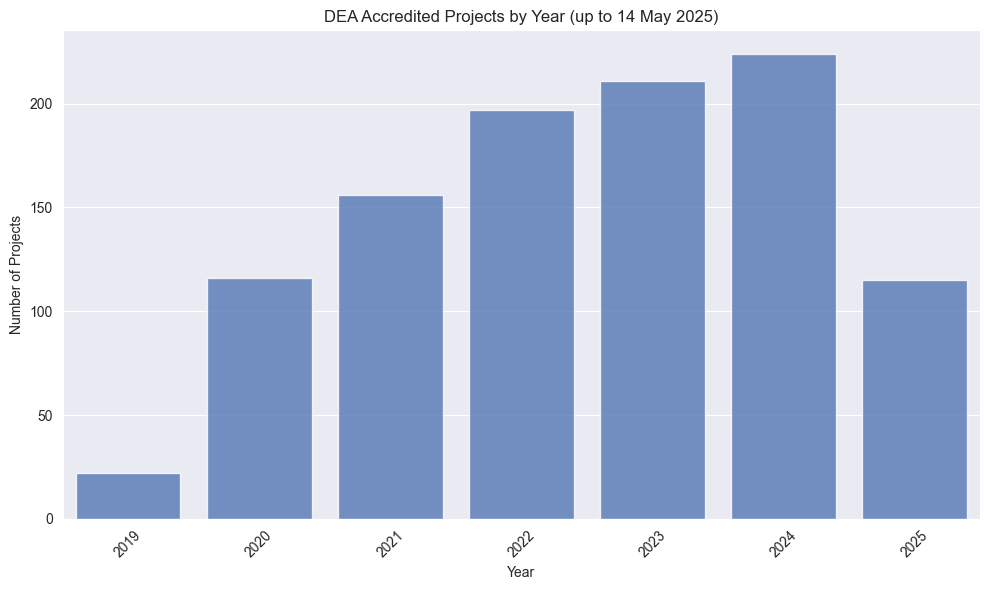

In [373]:
# Number of DEA accredited projects by year
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))

year_order = sorted(df['Accreditation Date Year'].dropna().unique())

sns.countplot(
    data=df,
    x='Accreditation Date Year',
    order=year_order,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white'
)

plt.title('DEA Accredited Projects by Year (up to 14 May 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- There is steady year-on-year growth in the number of approved projects under the DEA (note 2025 data is only to mid-May 2025)

In [374]:
flagship_projects = df[df['Project ID'].isin(data_flagship['Project ID'].unique())]
flagship_projects

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list
157,2021/035,"Shaping, testing and demonstrating the value o...","Polina Obolenskaya,\nLondon School of Economic...",Digital Economy Act 2017,Office for National Statistics: Growing Up in ...,Office for National Statistics Secure Research...,2021-11-05,2021Q4,2021,2021-10-01,Q4 2021,office for national statistics: growing up in ...,[growing up in england wave 1]
159,2021/038,Using linked Magistrates and Crown Court data ...,"Rebecca Pattinson, University of Lancaster",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-21,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
160,2021/039,A ticking social timebomb?' An investigation i...,"Angela Sorsby, University of Sheffield",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-11-05,2021Q4,2021,2021-10-01,Q4 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
161,2021/040,"Understanding the nature, extent and outcomes ...","Tim McSweeney, University of Hertfordshire",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-16,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
162,2021/041,Ethnic inequalities in the Criminal Justice Sy...,"Kitty Lymperopoulou, Manchester Metropolitan U...",Digital Economy Act 2017,Ministry of Justice: MoJ Data First Crown cour...,Office for National Statistics Secure Research...,2021-04-21,2021Q2,2021,2021-04-01,Q2 2021,ministry of justice: moj data first crown cour...,[moj data first crown court defendant case lev...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2025/039,Decoding the Signals from Classrooms: Early Wa...,"Huamao Wang, University of Nottingham",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-02-12,2025Q1,2025,2025-01-01,Q1 2025,nhs; dfe: education and child health insights ...,"[nhs, education and child health insights from..."
1142,2025/042,Understanding Household and Parental Predictor...,"Yu Cui, University of Reading\nHolly Joseph, U...",Digital Economy Act 2017,Office for National Statistics & Department fo...,Office for National Statistics Secure Research...,2025-02-19,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics & department fo...,"[growing up in england wave 1, growing up in e..."
1143,2025/056,The Heterogeneous Impact of Urban Renewal Prog...,"Edoardo Badii, University of Warwick\nPaul Dav...",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2025-02-26,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual respond...,"[annual respondents, database x ­ uk, annual s..."
1145,2025/074,Examining Associations between Disability with...,"Lijie Zeng, University of Edinburgh\nJasmin We...",Digital Economy Act 2017,Office for National Statistics & Department fo...,Office for National Statistics Secure Research...,2025-03-12,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics & department fo...,"[growing up in england wave 1, growing up in e..."


- Since Q1 2021 to end of Q1 2025, there have been 173 projects requesting access to a total of 218 ADR UK flagship datasets

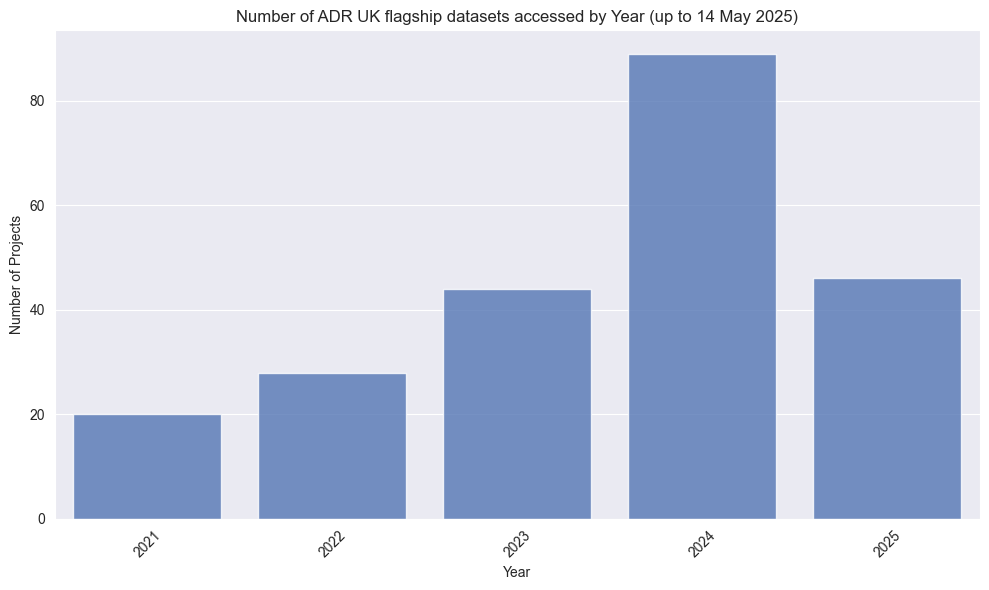

In [375]:
year_order = sorted(data_flagship['Accreditation Date Year'].dropna().unique()) # Number of DEA accredited projects using flagship datasets by year

plt.figure(figsize=(10, 6))
sns.countplot(
    data=data_flagship,
    x='Accreditation Date Year',
    order=year_order,
    color='#4472C4',
    alpha=0.8,
    edgecolor='white'
)
plt.title('Number of ADR UK flagship datasets accessed by Year (up to 14 May 2025)')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [376]:
# Truncate data up to (end of) Q1 2025, as we don't have all the data for Q2 2025 yet
# Define the cutoff: start of Q2 2025 = 1 April 2025
cutoff = pd.to_datetime("2025-04-01")

# Filter data_flagship to keep only rows before Q2 2025
data_flagship = data_flagship[data_flagship['Accreditation Date'] < cutoff]

In [377]:
# Some quarters have zero counts, so we need to create a full quarterly index
# Create full quarterly index from min to max quarter
full_quarters = pd.period_range(
    start=data_flagship['Accreditation Date Quarter'].min(),
    end=data_flagship['Accreditation Date Quarter'].max(),
    freq='Q'
)

# Create full multi-index with all collections
collections = data_flagship['collection'].dropna().unique()
full_index = pd.MultiIndex.from_product([full_quarters, collections], names=['Accreditation Date Quarter', 'collection'])

# Reindex to fill missing quarters with zero
collection_quarter_counts = (
    data_flagship
    .groupby(['Accreditation Date Quarter', 'collection'])
    .size()
    .reindex(full_index, fill_value=0)
    .reset_index(name='count')
)

# Add quarter_date and labels again
collection_quarter_counts['quarter_date'] = collection_quarter_counts['Accreditation Date Quarter'].dt.to_timestamp(how = 'start')
collection_quarter_counts['Quarter Label'] = collection_quarter_counts['Accreditation Date Quarter'].apply(
    lambda p: f"Q{p.quarter} {p.year}"
)

### Datasets included in WED collection:
- Annual Survey of Hours and Earnings Longitudinal  
- Annual Survey of Hours and Earnings Linked to Census 2011  
- Annual Survey of Hours and Earnings Linked to PAYE and Self-Assessment Data  

### Datasets included in Data First collection:
- Data First: Crown Court Dataset  
- Data First: Cross-Justice System Linking Dataset  
- Data First: Prisoner Dataset  
- Data First: Probation Dataset  
- Data First: Family Court Dataset  
- Data First: Magistrates Court Dataset  

In [378]:
# Generate summary tables of the data for the ADR UK flagship collections
# Create the full quarterly range
full_quarters = pd.period_range(
    start=data_flagship['Accreditation Date Quarter'].min(),
    end=data_flagship['Accreditation Date Quarter'].max(),
    freq='Q'
)
# Get all collections
collections = data_flagship['collection'].dropna().unique()
# Create the complete combinations
full_combinations = []
for quarter in full_quarters:
    for collection in collections:
        full_combinations.append({
            'Accreditation Date Quarter': quarter,
            'collection': collection,
            'quarter_date': quarter.to_timestamp(how='start'),
            'Quarter Label': f"Q{quarter.quarter} {quarter.year}"
        })
# Create the base dataframe with all combinations
base_df = pd.DataFrame(full_combinations)
# Get actual counts from original data
actual_counts = (
    data_flagship
    .groupby(['Accreditation Date Quarter', 'collection'])
    .size()
    .reset_index(name='count')
)
# Merge with base dataframe, filling missing with 0
collection_quarter_counts_new = base_df.merge(
    actual_counts,
    on=['Accreditation Date Quarter', 'collection'],
    how='left'
)
collection_quarter_counts_new['count'] = collection_quarter_counts_new['count'].fillna(0).astype(int)
# Now apply the NaN vs zero logic

# Find first appearance of each collection
first_appearance = (
    collection_quarter_counts_new[collection_quarter_counts_new['count'] > 0]
    .groupby('collection')['quarter_date']
    .min()
    .reset_index()
    .rename(columns={'quarter_date': 'first_quarter'})
)

# Merge back
collection_quarter_counts_new = collection_quarter_counts_new.merge(
    first_appearance,
    on='collection',
    how='left'
)
# Apply the logic
def assign_values(row):
    if pd.isna(row['first_quarter']):
        return np.nan  # Collection never appeared
    elif row['quarter_date'] < row['first_quarter']:
        return np.nan  # Before first appearance
    else:
        return row['count']  # Use actual count (0 or positive)
collection_quarter_counts_new['adjusted_count'] = collection_quarter_counts_new.apply(assign_values, axis=1)
#Create the pivot tables with proper chronological ordering
# Sort by date first
collection_quarter_counts_new = collection_quarter_counts_new.sort_values('quarter_date')
# Create count pivot using quarter_date as index, then map to Quarter Label
count_pivot = collection_quarter_counts_new.pivot_table(
    values='adjusted_count',
    index='quarter_date',  # Use quarter_date to maintain chronological order
    columns='collection',
    aggfunc='first'
)
# Create a mapping from quarter_date to Quarter Label in chronological order
quarter_label_mapping = (
    collection_quarter_counts_new[['quarter_date', 'Quarter Label']]
    .drop_duplicates()
    .sort_values('quarter_date')
    .set_index('quarter_date')['Quarter Label']
)
# Map the index to Quarter Labels while preserving order
count_pivot.index = count_pivot.index.map(quarter_label_mapping)
count_pivot.index.name = 'Quarter Label'

# Add row totals column
count_pivot['Total'] = count_pivot.sum(axis=1, skipna=True)

# Calculate summary statistics (including the new Total column)
summary_stats = pd.DataFrame({
    col: [
        count_pivot[col].sum(),
        count_pivot[col].mean(),
        count_pivot[col].median()
    ] for col in count_pivot.columns
}, index=['Total', 'Mean', 'Median'])

# Combine (this will maintain the chronological order)
count_table = pd.concat([count_pivot, summary_stats])

In [379]:
count_table

,Agricultural Research Collection,Data First,ECHILD,GRADE,Growing up in England,LEO,Wage and Employment Dynamics,Total
Q1 2021,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
Q2 2021,NaN,7.0000,NaN,NaN,NaN,3.0,0.000000,10.000000
Q3 2021,NaN,0.0000,NaN,NaN,NaN,0.0,1.000000,1.000000
Q4 2021,NaN,6.0000,NaN,NaN,1.0,0.0,0.000000,7.000000
Q1 2022,NaN,3.0000,NaN,NaN,0.0,6.0,1.000000,10.000000
Q2 2022,NaN,4.0000,NaN,NaN,1.0,2.0,3.000000,10.000000
Q3 2022,1.000000,0.0000,NaN,NaN,0.0,2.0,1.000000,4.000000
Q4 2022,0.000000,0.0000,NaN,NaN,2.0,1.0,1.000000,4.000000
Q1 2023,0.000000,0.0000,NaN,NaN,3.0,8.0,2.000000,13.000000
Q2 2023,1.000000,1.0000,NaN,NaN,3.0,1.0,2.000000,8.000000


In [380]:
# Create cumulative table with same approach
cumulative_data = []
for collection in collections:
    coll_data = collection_quarter_counts_new[
        collection_quarter_counts_new['collection'] == collection
    ].sort_values('quarter_date').copy()
   
    # Find first appearance
    first_quarter = coll_data[coll_data['count'] > 0]['quarter_date'].min()
   
    if pd.notna(first_quarter):
        coll_data['cumulative_count'] = np.nan
        mask = coll_data['quarter_date'] >= first_quarter
        coll_data.loc[mask, 'cumulative_count'] = coll_data.loc[mask, 'count'].cumsum()
    else:
        coll_data['cumulative_count'] = np.nan
   
    cumulative_data.append(coll_data)

cumulative_df = pd.concat(cumulative_data, ignore_index=True)

# Create cumulative pivot with chronological ordering
cumulative_pivot = cumulative_df.pivot_table(
    values='cumulative_count',
    index='quarter_date',  # Use quarter_date for proper ordering
    columns='collection',
    aggfunc='first'
)

# Map to Quarter Labels while preserving chronological order
cumulative_pivot.index = cumulative_pivot.index.map(quarter_label_mapping)
cumulative_pivot.index.name = 'Quarter Label'

# Add row totals column for cumulative data
cumulative_pivot['Total'] = cumulative_pivot.sum(axis=1, skipna=True)

# Summary stats for cumulative (including the new Total column)
cumulative_summary = pd.DataFrame({
    col: [
        cumulative_pivot[col].max(),                    # Final Total
        cumulative_pivot[col].iloc[-1] / len(cumulative_pivot[col].dropna()),  # Average per quarter
        (cumulative_pivot[col].iloc[-1] / cumulative_pivot[col].dropna().iloc[0]) ** (1/len(cumulative_pivot[col].dropna())) - 1  # Growth rate
    ] for col in cumulative_pivot.columns
}, index=['Final Total', 'Avg per Quarter', 'Growth Rate'])

cumulative_table = pd.concat([cumulative_pivot, cumulative_summary])

## Count table

|         | Agricultural Research Collection | Data First | ECHILD | GRADE | Growing up in England | LEO | Wage and Employment Dynamics | Total |
|---------|----------------------------------|------------|--------|-------|----------------------|-----|------------------------------|-------|
| Q1 2021 | -                                | -          | -      | -     | -                    | -   | 2                            | 2     |
| Q2 2021 | -                                | 7          | -      | -     | -                    | 3   | 0                            | 10    |
| Q3 2021 | -                                | 0          | -      | -     | -                    | 0   | 1                            | 1     |
| Q4 2021 | -                                | 6          | -      | -     | 1                    | 0   | 0                            | 7     |
| Q1 2022 | -                                | 3          | -      | -     | 0                    | 6   | 1                            | 10    |
| Q2 2022 | -                                | 4          | -      | -     | 1                    | 2   | 3                            | 10    |
| Q3 2022 | 1                                | 0          | -      | -     | 0                    | 2   | 1                            | 4     |
| Q4 2022 | 0                                | 0          | -      | -     | 2                    | 1   | 1                            | 4     |
| Q1 2023 | 0                                | 0          | -      | -     | 3                    | 8   | 2                            | 13    |
| Q2 2023 | 1                                | 1          | -      | -     | 3                    | 1   | 2                            | 8     |
| Q3 2023 | 0                                | 0          | -      | -     | 2                    | 4   | 3                            | 9     |
| Q4 2023 | 0                                | 8          | -      | -     | 0                    | 2   | 4                            | 14    |
| Q1 2024 | 0                                | 2          | -      | -     | 0                    | 7   | 2                            | 11    |
| Q2 2024 | 0                                | 11         | -      | -     | 0                    | 8   | 2                            | 21    |
| Q3 2024 | 0                                | 0          | 1      | 5     | 0                    | 18  | 2                            | 26    |
| Q4 2024 | 2                                | 5          | 10     | 4     | 3                    | 6   | 1                            | 31    |
| Q1 2025 | 0                                | 2          | 12     | 1     | 6                    | 12  | 4                            | 37    |
| **Total**   | **4**                            | **49**     | **23** | **10** | **21**               | **80** | **31**                       | **218** |
| **Mean**    | **0.36**                         | **3.06**   | **7.67** | **3.33** | **1.5**              | **5** | **1.82**                     | **12.82** |
| **Median**  | **0**                            | **2**      | **10** | **4**  | **1**                | **3.5** | **2**                        | **10** |

In [381]:
cumulative_table

,Agricultural Research Collection,Data First,ECHILD,GRADE,Growing up in England,LEO,Wage and Employment Dynamics,Total
Q1 2021,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
Q2 2021,NaN,7.000000,NaN,NaN,NaN,3.000000,2.000000,12.000000
Q3 2021,NaN,7.000000,NaN,NaN,NaN,3.000000,3.000000,13.000000
Q4 2021,NaN,13.000000,NaN,NaN,1.000000,3.000000,3.000000,20.000000
Q1 2022,NaN,16.000000,NaN,NaN,1.000000,9.000000,4.000000,30.000000
Q2 2022,NaN,20.000000,NaN,NaN,2.000000,11.000000,7.000000,40.000000
Q3 2022,1.000000,20.000000,NaN,NaN,2.000000,13.000000,8.000000,44.000000
Q4 2022,1.000000,20.000000,NaN,NaN,4.000000,14.000000,9.000000,48.000000
Q1 2023,1.000000,20.000000,NaN,NaN,7.000000,22.000000,11.000000,61.000000
Q2 2023,2.000000,21.000000,NaN,NaN,10.000000,23.000000,13.000000,69.000000


## Cumulative table
|              | Agricultural Research Collection | Data First | ECHILD | GRADE | Growing up in England | LEO | Wage and Employment Dynamics | Total |
|--------------|----------------------------------|------------|--------|-------|----------------------|-----|------------------------------|-------|
| Q1 2021      | -                                | -          | -      | -     | -                    | -   | 2                            | 2     |
| Q2 2021      | -                                | 7          | -      | -     | -                    | 3   | 2                            | 12    |
| Q3 2021      | -                                | 7          | -      | -     | -                    | 3   | 3                            | 13    |
| Q4 2021      | -                                | 13         | -      | -     | 1                    | 3   | 3                            | 20    |
| Q1 2022      | -                                | 16         | -      | -     | 1                    | 9   | 4                            | 30    |
| Q2 2022      | -                                | 20         | -      | -     | 2                    | 11  | 7                            | 40    |
| Q3 2022      | 1                                | 20         | -      | -     | 2                    | 13  | 8                            | 44    |
| Q4 2022      | 1                                | 20         | -      | -     | 4                    | 14  | 9                            | 48    |
| Q1 2023      | 1                                | 20         | -      | -     | 7                    | 22  | 11                           | 61    |
| Q2 2023      | 2                                | 21         | -      | -     | 10                   | 23  | 13                           | 69    |
| Q3 2023      | 2                                | 21         | -      | -     | 12                   | 27  | 16                           | 78    |
| Q4 2023      | 2                                | 29         | -      | -     | 12                   | 29  | 20                           | 92    |
| Q1 2024      | 2                                | 31         | -      | -     | 12                   | 36  | 22                           | 103   |
| Q2 2024      | 2                                | 42         | -      | -     | 12                   | 44  | 24                           | 124   |
| Q3 2024      | 2                                | 42         | 1      | 5     | 12                   | 62  | 26                           | 150   |
| Q4 2024      | 4                                | 47         | 11     | 9     | 15                   | 68  | 27                           | 181   |
| Q1 2025      | 4                                | 49         | 23     | 10    | 21                   | 80  | 31                           | 218   |
| **Final Total**  | **4**                            | **49**     | **23** | **10** | **21**               | **80** | **31**                       | **218** |
| **Avg per Quarter** | **0.36**                      | **3.06**   | **7.67** | **3.33** | **1.5**              | **5** | **1.82**                     | **12.82** |
| **Growth Rate**  | **0.13**                         | **0.13**   | **1.24** | **0.26** | **0.24**             | **0.23** | **0.17**                     | **0.32** |

- Final total shows data up to end of Q1 2025 (end March 2025)
- Growth rate shows the **compound** quarterly growth rate

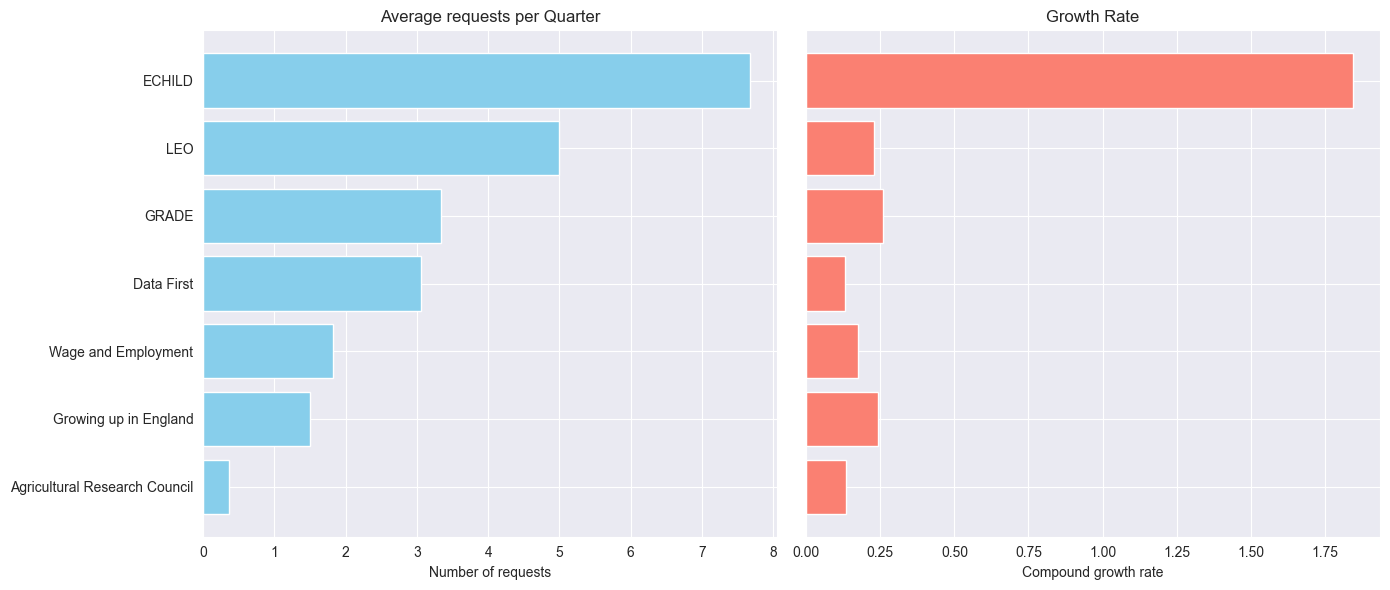

In [382]:
data = {
    "Dataset": [
        "Agricultural Research Council", "Data First", "ECHILD", "GRADE",
        "Growing up in England", "LEO", "Wage and Employment", "Total"
    ],
    "Avg per Quarter": [
        0.36363636363636365, 3.0625, 7.666666666666667, 3.3333333333333335,
        1.5, 5.0, 1.8235294117647058, 12.823529411764707
    ],
    "Growth Rate": [
        0.13431252219546264, 0.1293241814724655, 1.8438669798515654, 0.2599210498948732,
        0.24292303070223915, 0.22778704262116656, 0.1749503410423121, 0.31779731252562415
    ]
}

# Create DataFrame and remove 'Total'
growth_data = pd.DataFrame(data)
growth_data = growth_data[growth_data["Dataset"] != "Total"]

# Sort each metric separately
avg_sorted = growth_data.sort_values("Avg per Quarter")
growth_sorted = growth_data.sort_values("Growth Rate")

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Avg per Quarter plot
axes[0].barh(avg_sorted["Dataset"], avg_sorted["Avg per Quarter"], color='skyblue')
axes[0].set_title("Average requests per Quarter")
axes[0].set_xlabel("Number of requests")

# Growth Rate plot
axes[1].barh(growth_sorted["Dataset"], growth_sorted["Growth Rate"], color='salmon')
axes[1].set_title("Growth Rate")
axes[1].set_xlabel("Compound growth rate")

# Tight layout
plt.tight_layout()
plt.show()

In [383]:
cumulative_table

,Agricultural Research Collection,Data First,ECHILD,GRADE,Growing up in England,LEO,Wage and Employment Dynamics,Total
Q1 2021,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
Q2 2021,NaN,7.000000,NaN,NaN,NaN,3.000000,2.000000,12.000000
Q3 2021,NaN,7.000000,NaN,NaN,NaN,3.000000,3.000000,13.000000
Q4 2021,NaN,13.000000,NaN,NaN,1.000000,3.000000,3.000000,20.000000
Q1 2022,NaN,16.000000,NaN,NaN,1.000000,9.000000,4.000000,30.000000
Q2 2022,NaN,20.000000,NaN,NaN,2.000000,11.000000,7.000000,40.000000
Q3 2022,1.000000,20.000000,NaN,NaN,2.000000,13.000000,8.000000,44.000000
Q4 2022,1.000000,20.000000,NaN,NaN,4.000000,14.000000,9.000000,48.000000
Q1 2023,1.000000,20.000000,NaN,NaN,7.000000,22.000000,11.000000,61.000000
Q2 2023,2.000000,21.000000,NaN,NaN,10.000000,23.000000,13.000000,69.000000


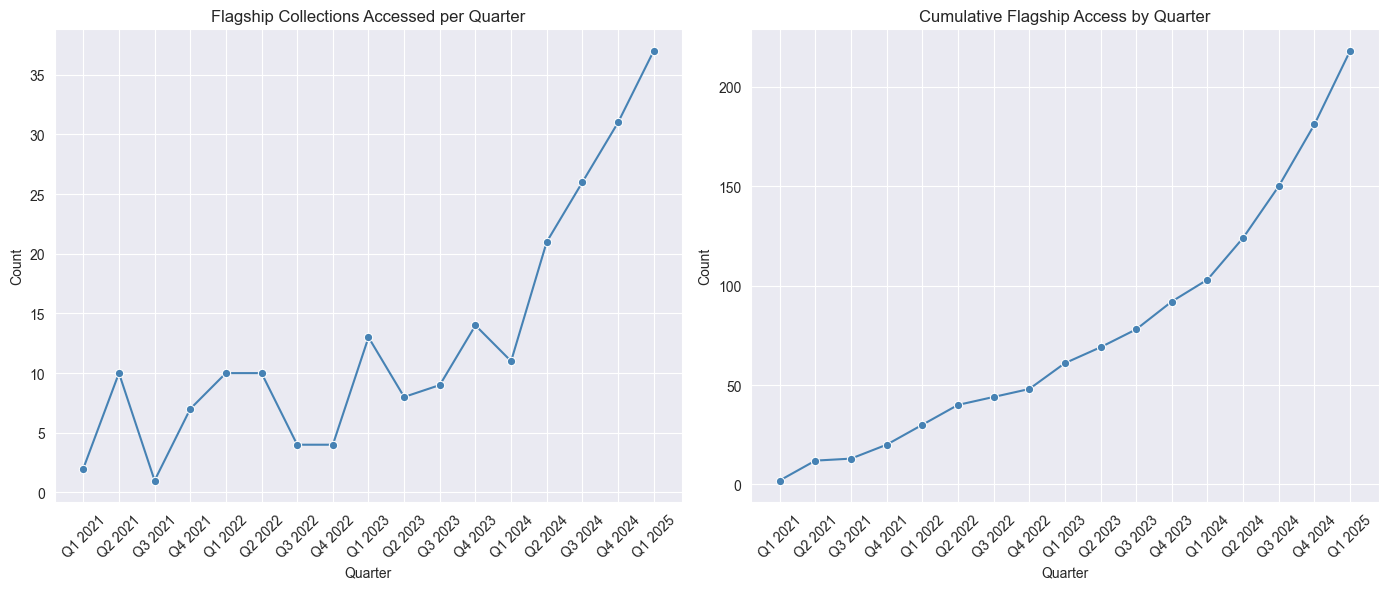

In [384]:
all_count_data = count_table.iloc[:-3, :].copy()
all_culm_count_data = cumulative_table.iloc[:-3, :].copy()

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

# Plot 1: Non-cumulative count
sns.lineplot(
    data=all_count_data,
    x=all_count_data.index,
    y=all_count_data['Total'],
    marker='o',
    color='steelblue',
    ax=axes[0]
)
axes[0].set_title('Flagship Collections Accessed per Quarter')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Cumulative count
sns.lineplot(
    data=all_culm_count_data,
    x=all_culm_count_data.index,
    y='Total',
    marker='o',
    color='steelblue',
    ax=axes[1]
)
axes[1].set_title('Cumulative Flagship Access by Quarter')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Layout
plt.tight_layout()
plt.show()


# Summary findings:
- The rate of access requests for ADR UK flagship datasets is increasing particualrly since start of 2024 - this is largely driven by increases in requests for LEO and ECHILD.
- LEO has been the most popular dataset overall, followed by datasets from the Ministry of Justice Data First collection. ECHILD has seen the most explosive growth in use since access was opened in Q3 2024.

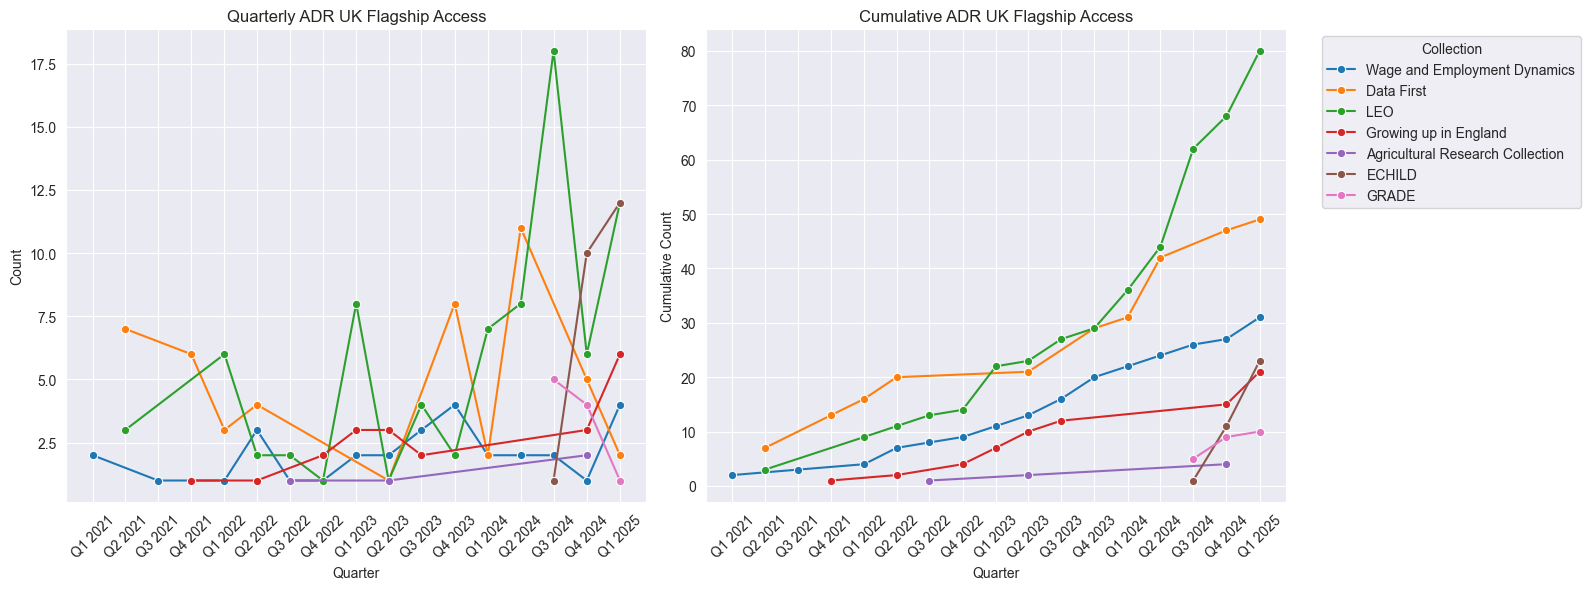

In [385]:
# Aggregate quarterly and cumulative counts
collection_quarter_counts = data_flagship.groupby(['quarter_date', 'collection']).size().reset_index(name='count')
collection_quarter_counts.sort_values(['quarter_date', 'collection'], inplace=True)
collection_quarter_counts['cumulative_count'] = collection_quarter_counts.groupby('collection')['count'].cumsum()

# Merge Quarter Labels
quarter_labels = data_flagship[['quarter_date', 'Quarter Label']].drop_duplicates()
collection_quarter_counts = collection_quarter_counts.merge(quarter_labels, on='quarter_date', how='left')

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# Non-cumulative plot
sns.lineplot(
    data=collection_quarter_counts,
    x='quarter_date',
    y='count',
    hue='collection',
    palette='tab10',
    marker='o',
    ax=axes[0]
)
axes[0].set_title('Quarterly ADR UK Flagship Access')
axes[0].set_xlabel('Quarter')
axes[0].set_ylabel('Count')
axes[0].set_xticks(collection_quarter_counts['quarter_date'].unique())
axes[0].set_xticklabels(
    collection_quarter_counts.drop_duplicates('quarter_date')['Quarter Label'].tolist(),
    rotation=45
)

# Cumulative plot
sns.lineplot(
    data=collection_quarter_counts,
    x='quarter_date',
    y='cumulative_count',
    hue='collection',
    palette='tab10',
    marker='o',
    ax=axes[1]
)
axes[1].set_title('Cumulative ADR UK Flagship Access')
axes[1].set_xlabel('Quarter')
axes[1].set_ylabel('Cumulative Count')
axes[1].set_xticks(collection_quarter_counts['quarter_date'].unique())
axes[1].set_xticklabels(
    collection_quarter_counts.drop_duplicates('quarter_date')['Quarter Label'].tolist(),
    rotation=45
)

# Shared legend
axes[1].legend(title='Collection', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].legend_.remove()  # Remove legend from first plot

plt.tight_layout()
plt.show()

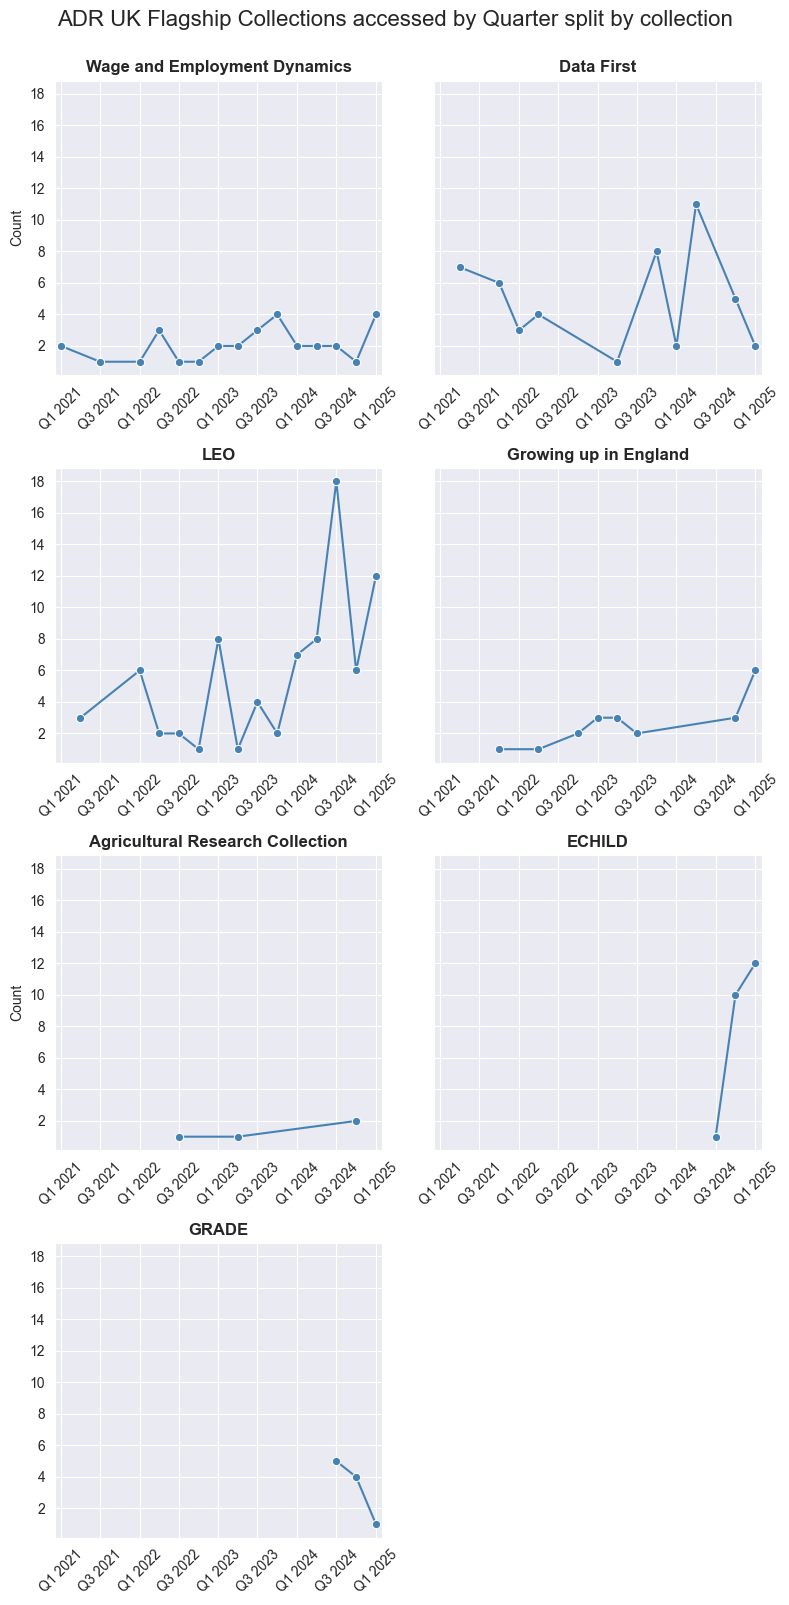

In [386]:
# Get unique collections and the full quarter range
collections = collection_quarter_counts['collection'].unique()
all_quarters = collection_quarter_counts['quarter_date'].unique()
all_quarter_labels = collection_quarter_counts.drop_duplicates('quarter_date')['Quarter Label'].tolist()

n_collections = len(collections)

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 16), sharey=True)
axes = axes.flatten()  # Make it easier to iterate

for i, collection in enumerate(collections):
    # Filter data for this collection
    collection_data = collection_quarter_counts[collection_quarter_counts['collection'] == collection]
    
    # Plot on the specific subplot
    sns.lineplot(
        data=collection_data,
        x='quarter_date',
        y='count',
        marker='o',
        ax=axes[i],
        color='steelblue'
    )
    
    # Format the subplot
    axes[i].set_title(collection, fontsize=12, fontweight='bold')
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('Count' if i % 4 == 0 else '')  # Only show y-label on leftmost plots
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    
    # Set ALL quarters on x-axis (this is the key change)
    step = max(1, len(all_quarters) // 8)  # Show every nth quarter to avoid crowding
    axes[i].set_xticks(all_quarters[::step])
    axes[i].set_xticklabels(all_quarter_labels[::step], rotation=45)
    
    # Add padding to x-axis limits to prevent marker cutoff
    time_range = all_quarters[-1] - all_quarters[0]
    padding = time_range * 0.02  # 2% padding on each side
    axes[i].set_xlim(all_quarters[0] - padding, all_quarters[-1] + padding)
    
    # Add small padding to y-axis as well
    axes[i].margins(y=0.05)  # 5% padding on y-axis

# Hide any unused subplots
for i in range(n_collections, len(axes)):
    axes[i].set_visible(False)

plt.suptitle('ADR UK Flagship Collections accessed by Quarter split by collection', fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

## Other directions
- Look at researcher home organisations to understand variation in demand for different flagship datasets among different research organisations (could help identify underrepresented orgs)

## How have research topics and prioirites evolved over time?

- Look at project titles to derive research focus
- Track emerging and declining terms over time
- N-gram analysis (1-3 grams) by year/quarter
- TF-IDF scoring to identify distinctive terms per period
- Track growth/decline of specific research keywords
- Create word clouds for different time periods
- Identify "trending" vs "declining" research 

Alluvial diagrams showing topic flow over time
Network graphs showing research theme relationships
Timeline plots of emerging vs declining research areas

# Dynamic Topic Modeling with Latent Dirichlet Allocation (LDA)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim

# Approach A: Static topics tracked over time
- Extract topics from all titles using LDA
- Track topic prevalence by quarter/year
- Visualize topic evolution with line plots

# Approach B: Dynamic topic modeling
- Use gensim's Dynamic Topic Model or BERTopic
- Automatically detect how topics emerge, evolve, and fade

1. Basic keyword frequency analysis by time period
2. Simple topic modeling (5-10 topics) with LDA
3. Word clouds for different years
4. N-gram analysis to find common phrases

In [387]:
# Simple count of word frequencies across all project titles
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# stopwrods
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
custom_stopwords = stop_words.union({'uk', 'england', 'analysis', 'data', 'wales', 'northern', 'ireland', 'scotland', 'outcome', 'outcomes', 'effect', 'evaluation', 'impact',
                                     'understanding', 'research', 'study', 'project', 'use', 'used', 'useful', 'using', 'dataset', 'datasets', 'collection', 'effects'})

# Tokenize project titles
def tokenize(text):
    return re.sub(r'[^\w\s]', ' ', #remove punctuation/replace these with a space
                  text.lower()).split()

# Flatten all tokenized words from job titles
all_words = [word for title in df['Title'] for word in tokenize(title) if word not in custom_stopwords]

word_counts = Counter(all_words)

# Display top 20 word counts
print("Most common words in job titles:")
print(word_counts.most_common(20))

Most common words in job titles:
[('labour', 85), ('health', 75), ('market', 74), ('education', 68), ('social', 60), ('covid', 55), ('productivity', 53), ('19', 53), ('economic', 52), ('employment', 44), ('local', 41), ('business', 39), ('innovation', 39), ('level', 38), ('children', 38), ('firm', 36), ('inequalities', 36), ('mobility', 36), ('firms', 32), ('evidence', 31)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [388]:
# Cluster analysis
# pre-process the project titles
def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    #remove stopwords
    text = ' '.join([word for word in text.split() if word not in custom_stopwords])
    return text
# Apply the preprocessing function to the project titles
df['processed_titles'] = df['Title'].apply(preprocess_text)

# Create a list of all project titles
project_titles = df['processed_titles'].tolist()

# Vectorise with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords))
X = vectorizer.fit_transform(project_titles)

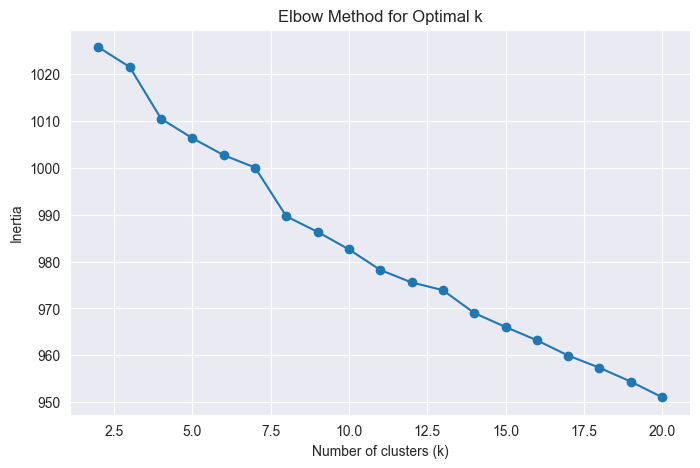

In [389]:
from sklearn.cluster import KMeans
# Try a range of cluster counts
inertia = []
K_range = range(2, 21)  # Try from 2 to 20 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)  # Inertia = sum of squared distances to nearest centroid

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [390]:
# Cluster with KMeans
from sklearn.cluster import KMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42) # n_clusters as determined from elbow method
kmeans.fit(X)

labels = kmeans.labels_

# generarte dataframe with keywords and their cluster labels
clustered = pd.DataFrame({
    'title': project_titles,
    'cluster': labels
})

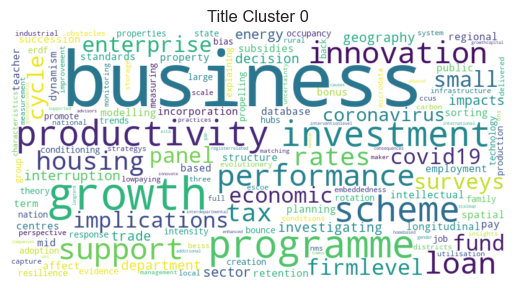

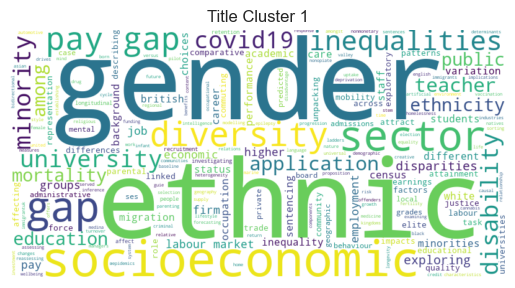

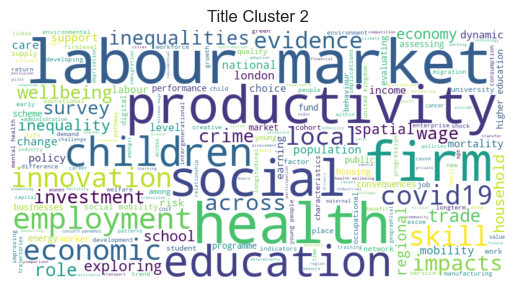

In [391]:
#visualise with wordcloud
from wordcloud import WordCloud

for i in range(n_clusters):
    text = ' '.join(clustered[clustered['cluster'] == i]['title'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Title Cluster {i}")
    plt.show()

- Research themes across all DEA accredited projects over the past 6 years can be split very broadly into three clusters, one with project titles focusing on business, productivity, and labour; another on gender and ethnicity inequalities and gaps, and a final cluster focused on health, social and COVID-19 research themes

In [392]:
df

,Project ID,Title,Researchers,Legal Basis,Datasets Used,Secure Research Service,Accreditation Date,Accreditation Date Quarter,Accreditation Date Year,quarter_date,Quarter Label,datasets_clean,dataset_list,processed_titles
0,2019/003,The fall of the labour share and rise of the s...,"Carolin Ioramashvili, London School of Economics",Digital Economy Act 2017,Office for National Statistics: Annual Respond...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: annual respond...,[annual respondents database],fall labour share rise superstar region labour...
1,2019/004,The changing nature of the HR and training pra...,"Jonathan Boys, Chartered Institute of Personne...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2019-10-25,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: annual populat...,[annual population survey],changing nature hr training practitioner profe...
2,2019/006,Analysis of victimisation data from the Crime ...,"Julian Molina, Office of the Victims' Commissi...",Digital Economy Act 2017,Office for National Statistics: Crime Survey f...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: crime survey f...,[crime survey for england and wales],victimisation crime survey
3,2019/007,Thriving Places index – indicators of wellbein...,"Soraya Safazadeh, Happy City Initiative\nSaama...",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-10-14,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: labour force s...,[labour force survey & annual population survey],thriving places index indicators wellbeing loc...
4,2019/008,Class in UK creative industries: Beyond partic...,"Rebecca Florisson, The Work Foundation",Digital Economy Act 2017,Office for National Statistics: Labour Force S...,Office for National Statistics Secure Research...,2019-11-19,2019Q4,2019,2019-10-01,Q4 2019,office for national statistics: labour force s...,[labour force survey & annual population surve...,class creative industries beyond participation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,2025/090,Exploring the Link Between Technological Adopt...,"Mariana Sofia Soares \nAraujo Barbosa, Univers...",Digital Economy Act 2017,Office for National Statistics: Annual Busines...,Office for National Statistics Secure Research...,2025-03-28,2025Q1,2025,2025-01-01,Q1 2025,office for national statistics: annual busines...,"[annual business survey, e-commerce and digita...",exploring link technological adoption exportin...
1149,2025/098,The NoRePF Project: Improving maternal and chi...,"Hannah Rayment-Jones, King's College London\nS...",Digital Economy Act 2017,NHS; DfE: Education and Child Health Insights ...,Office for National Statistics Secure Research...,2025-04-09,2025Q2,2025,2025-04-01,Q2 2025,nhs; dfe: education and child health insights ...,"[nhs, education and child health insights from...",norepf improving maternal child health social ...
1150,2025/113,Evaluating expanded childcare entitlements,"Elaine Drayton, Institute for Fiscal Studies\n...",Digital Economy Act 2017,Office for National Statistics: Annual Populat...,Office for National Statistics Secure Research...,2025-05-09,2025Q2,2025,2025-04-01,Q2 2025,office for national statistics: annual populat...,"[annual population survey, annual population s...",evaluating expanded childcare entitlements
1151,2025/114,Marie Curie End of Life Transformation,"Lynne Hughes, Marie Curie\nMichelle Vermeulen",Digital Economy Act 2017,SAIL Databank: Census Wales 2021,SAIL,2025-05-12,2025Q2,2025,2025-04-01,Q2 2025,sail databank: census wales 2021,[census wales 2021],marie curie end life transformation


Documents per year:
2019: 22 projects
2020: 116 projects
2021: 156 projects
2022: 197 projects
2023: 211 projects
2024: 224 projects
2025: 115 projects

Note: 2019 data is Q4 only; 2025 data is partial (Q1 and early Q2 only)


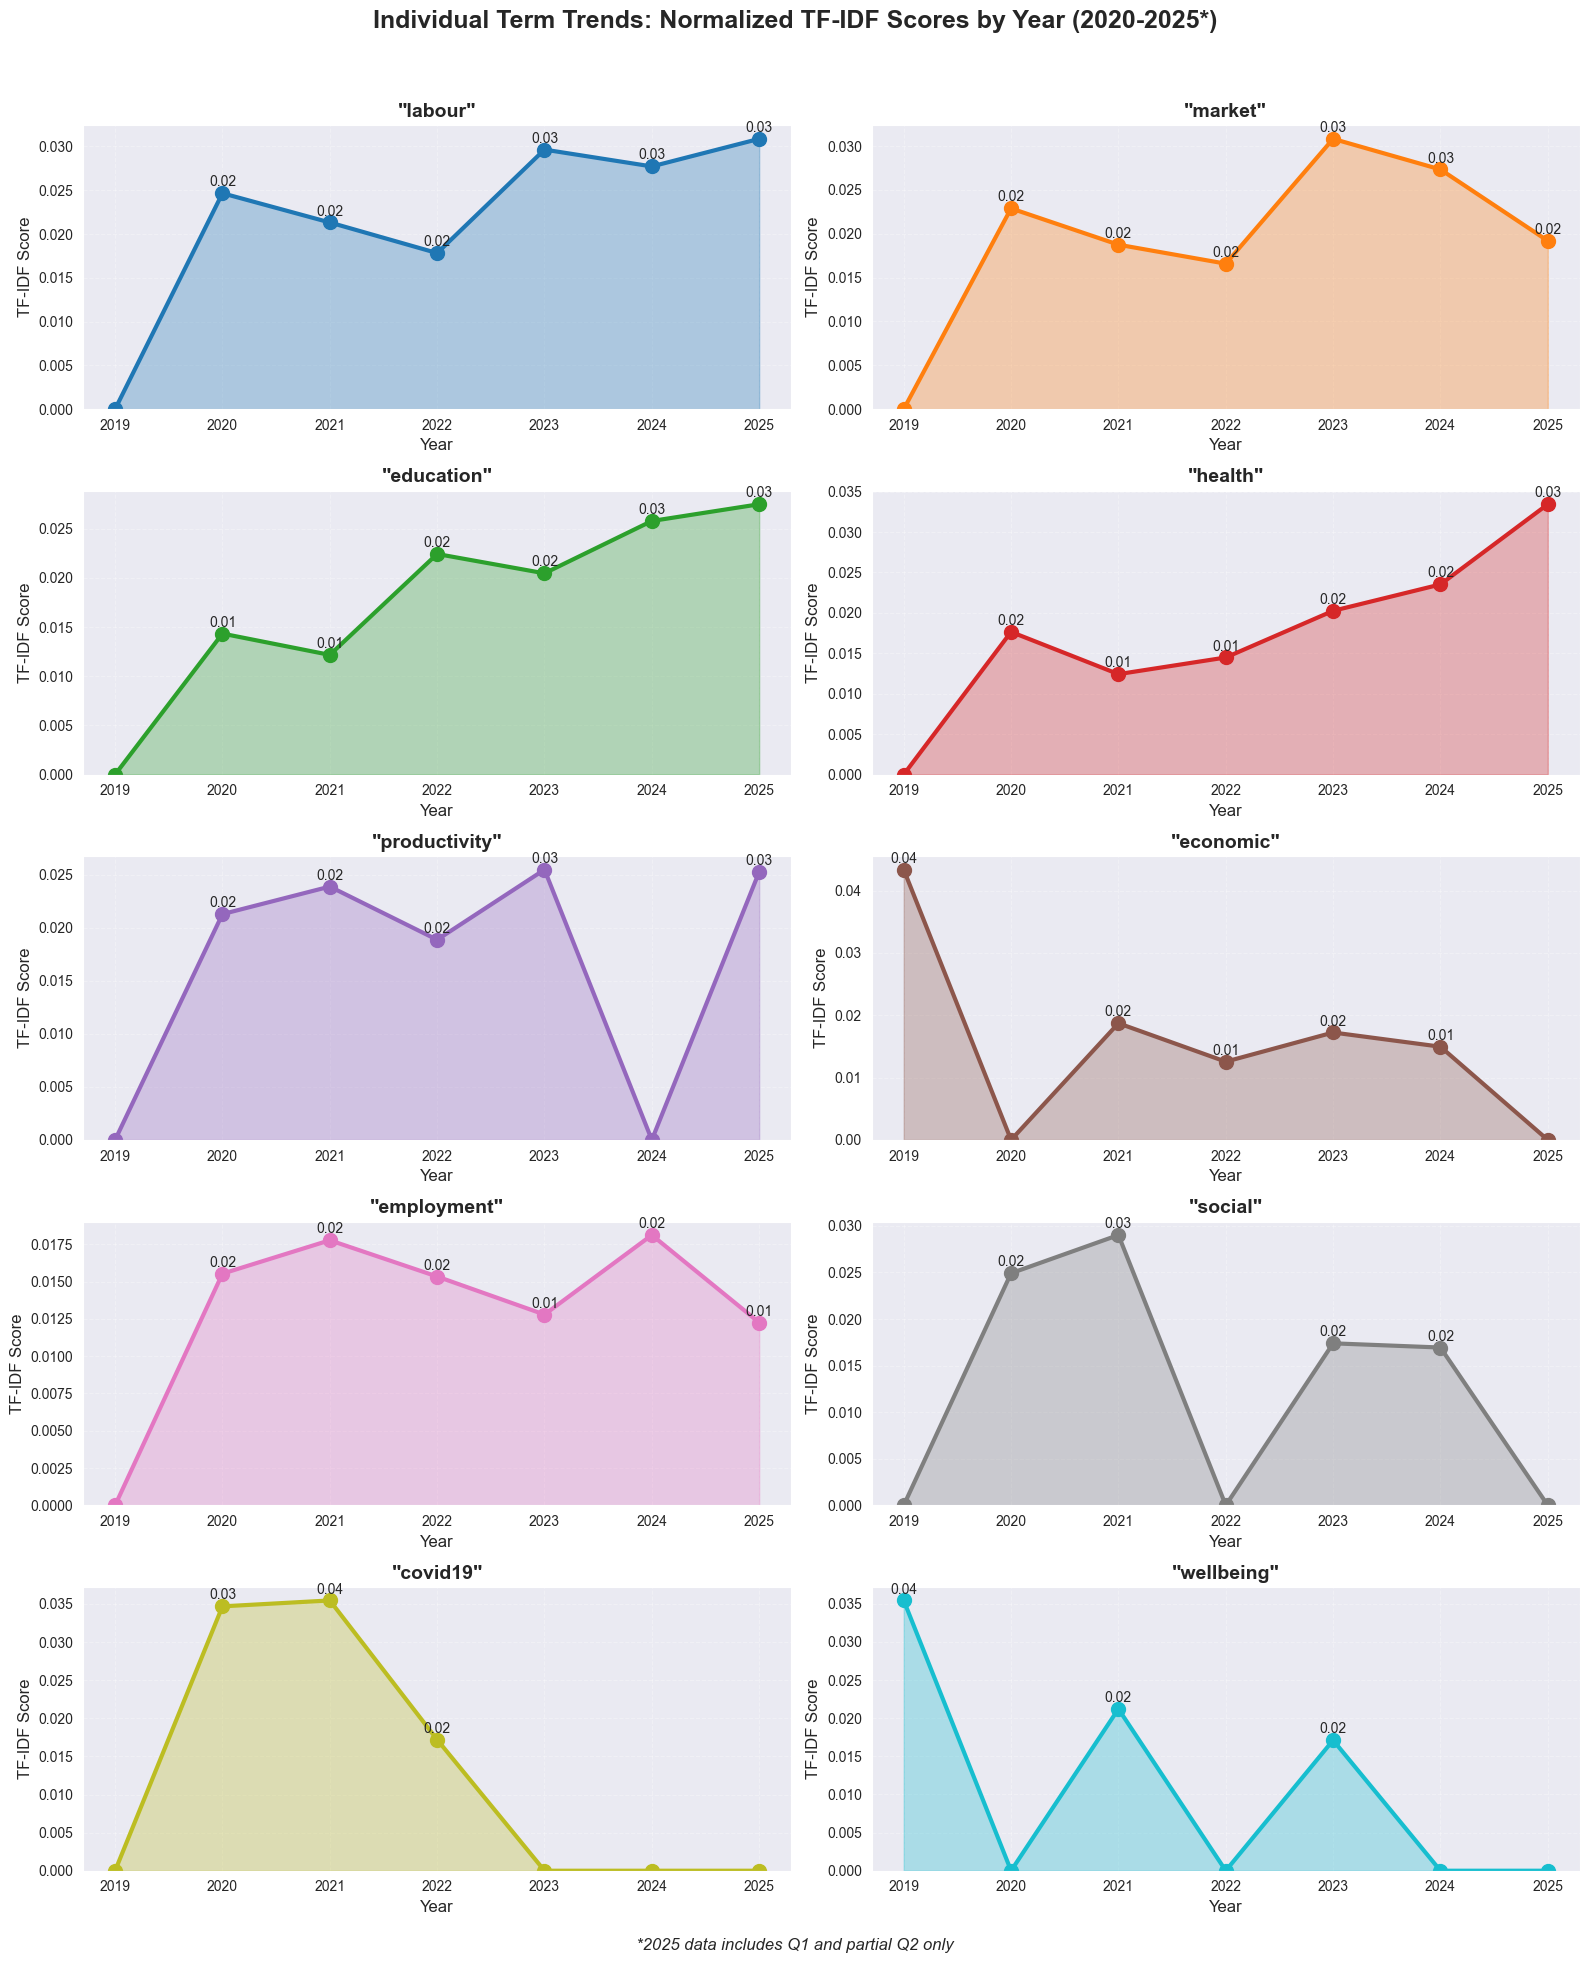

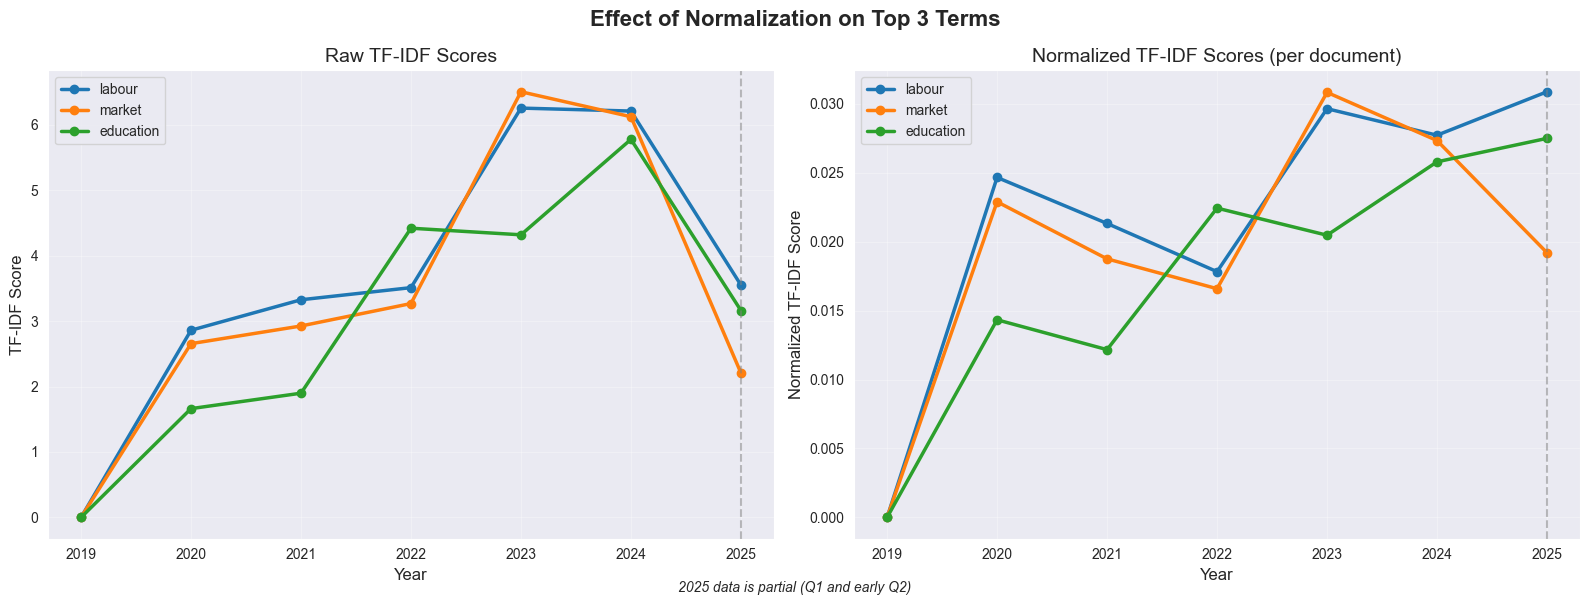

Documents per year:
2020: 116 projects
2021: 156 projects
2022: 197 projects
2023: 211 projects
2024: 224 projects
2025: 115 projects

Note: 2025 data is partial (Q1 and early Q2 only)


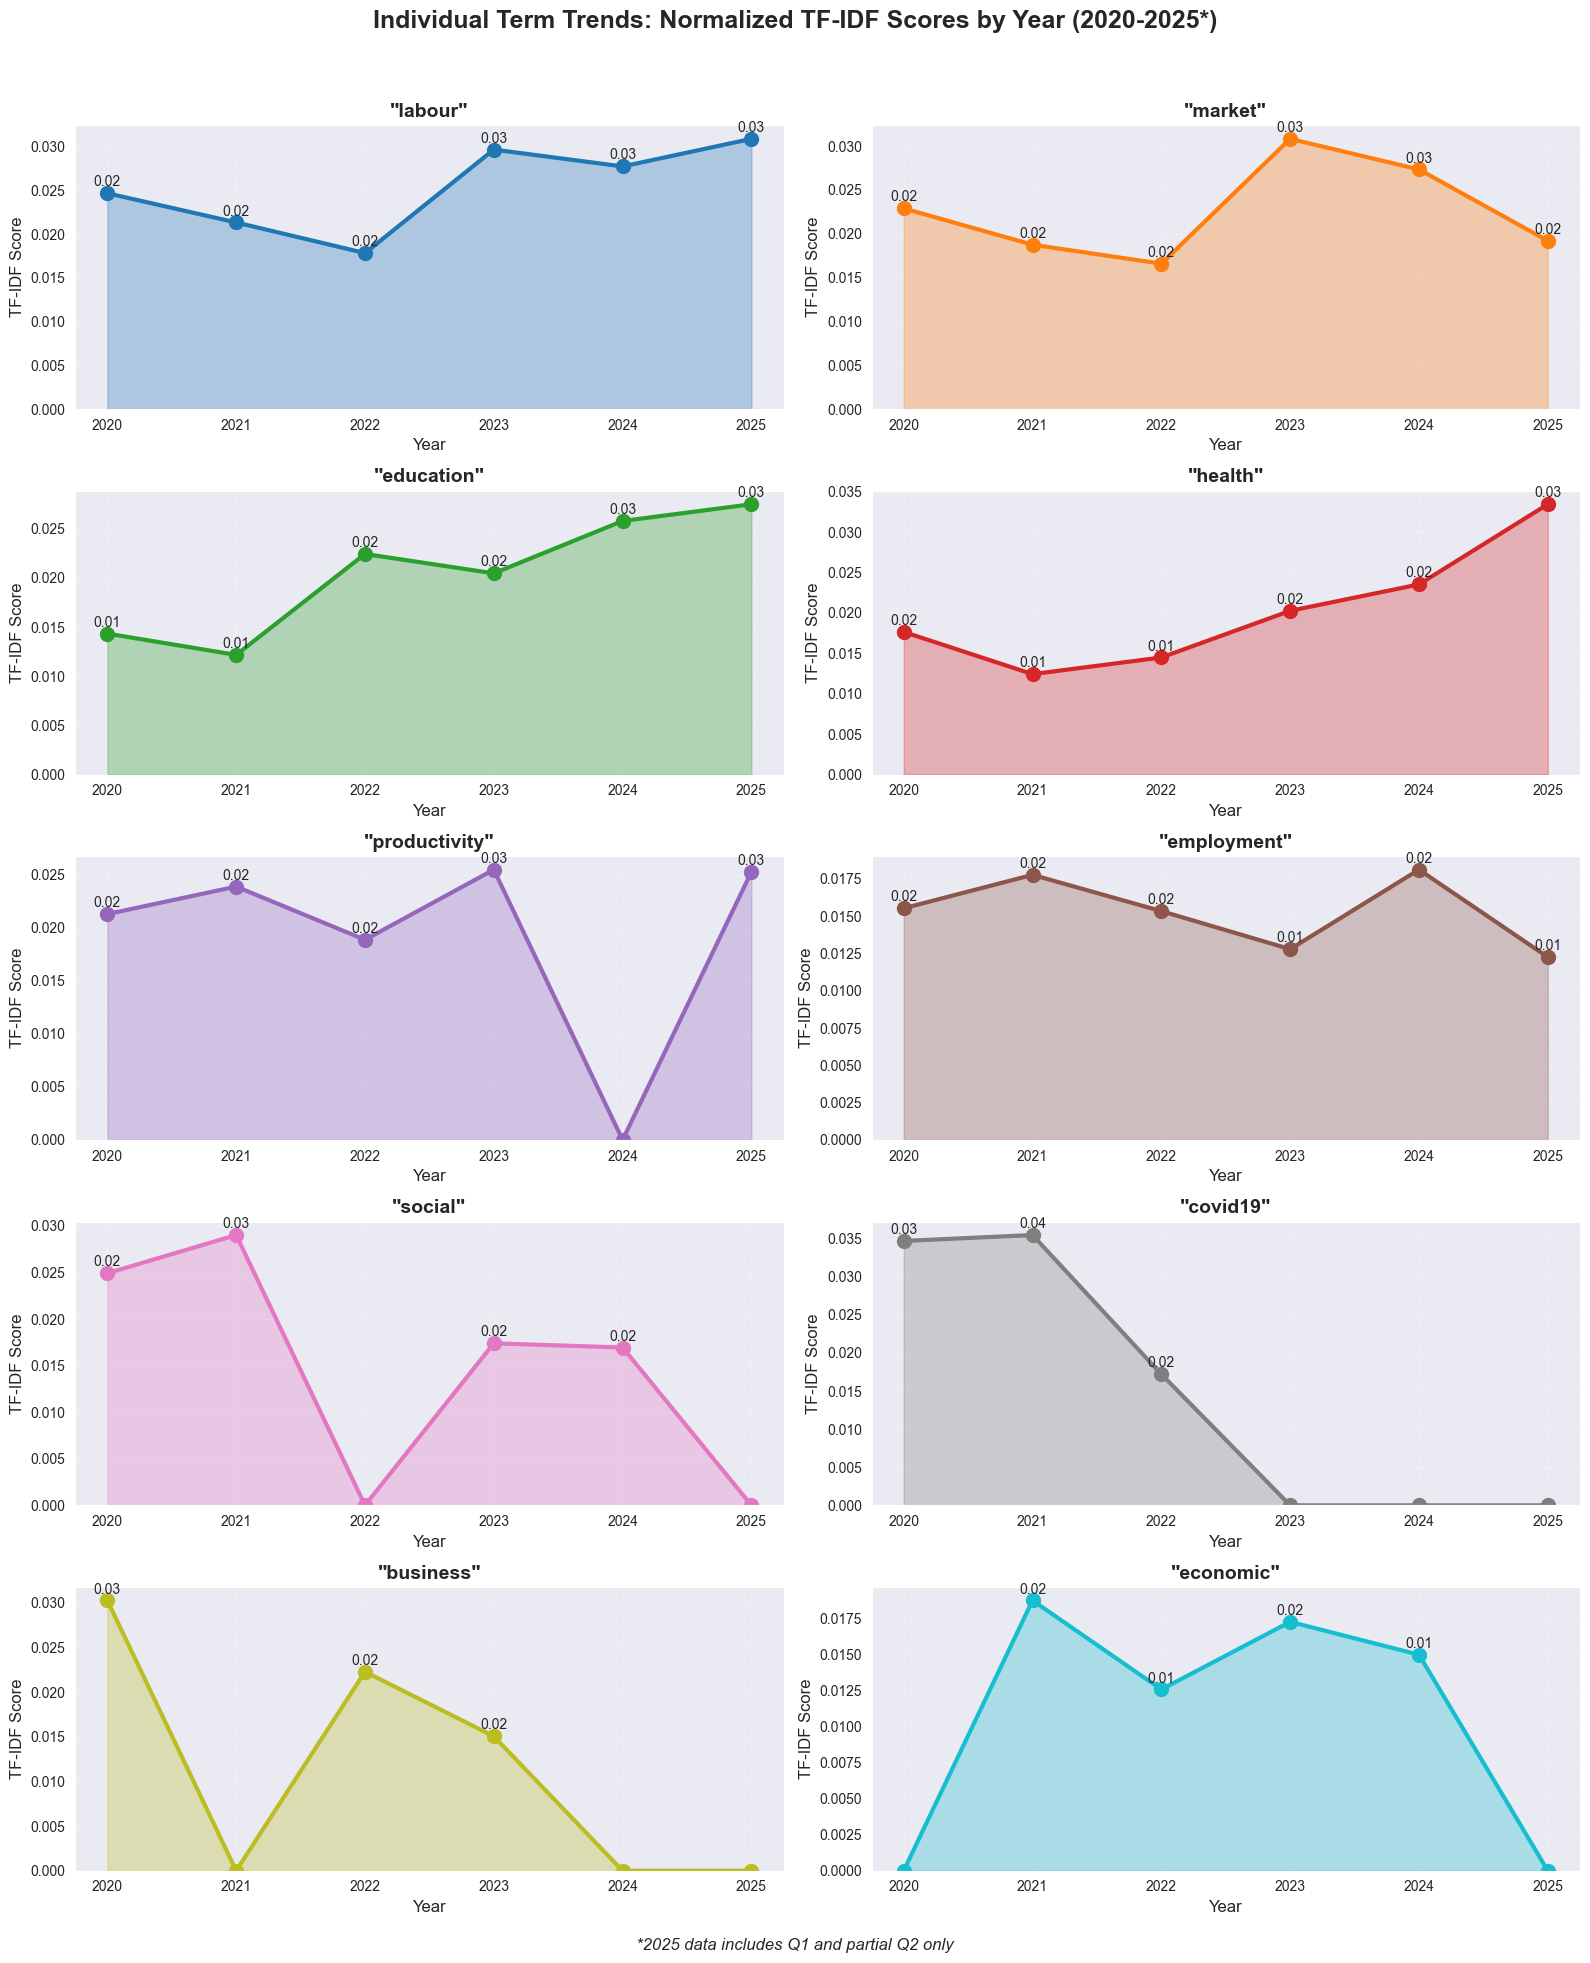

In [405]:
def top_tfidf_dict(docs, n=20):
    vectorizer = TfidfVectorizer(stop_words=list(custom_stopwords))
    X = vectorizer.fit_transform(docs)
    scores = X.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()
    sorted_terms = sorted(zip(terms, scores), key=lambda x: x[1], reverse=True)
    return dict(sorted_terms[:n])

# Filter data - exclude 2019, include 2020-2025
df_filtered = df[df['Accreditation Date Year'] >= 2020]

# Apply by year and normalize by number of documents
tfidf_dict_by_year = {}
docs_per_year = {}

for year, group in df_filtered.groupby('Accreditation Date Year'):
    docs_count = len(group)
    docs_per_year[year] = docs_count
    
    # Get raw TF-IDF scores
    raw_scores = top_tfidf_dict(group['processed_titles'])
    
    # Normalize by number of documents
    normalized_scores = {term: score / docs_count for term, score in raw_scores.items()}
    tfidf_dict_by_year[year] = normalized_scores

# Print number of documents per year
print("Documents per year:")
for year in sorted(docs_per_year.keys()):
    print(f"{year}: {docs_per_year[year]} projects")
    
print(f"\nNote: 2025 data is partial (Q1 and early Q2 only)")

# Get all unique terms across all years
all_terms = set()
for year_dict in tfidf_dict_by_year.values():
    all_terms.update(year_dict.keys())

# Find top 10 terms by total TF-IDF score across all years
term_totals = {}
for term in all_terms:
    total = sum(year_dict.get(term, 0) for year_dict in tfidf_dict_by_year.values())
    term_totals[term] = total

top_10_terms = sorted(term_totals.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_term_names = [term for term, _ in top_10_terms]

# Create DataFrame for plotting
years = sorted(tfidf_dict_by_year.keys())
data_for_plot = []

for term in top_10_term_names:
    for year in years:
        score = tfidf_dict_by_year[year].get(term, 0)
        data_for_plot.append({
            'Year': year,
            'Term': term,
            'TF-IDF Score': score
        })

plot_df = pd.DataFrame(data_for_plot)

# Create individual subplots for each term
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for i, term in enumerate(top_10_term_names):
    ax = axes[i]
    term_data = plot_df[plot_df['Term'] == term]
    
    ax.plot(term_data['Year'], term_data['TF-IDF Score'], 
            marker='o', linewidth=3, markersize=10,
            color=colors[i])
    
    # Fill area under the line
    ax.fill_between(term_data['Year'], term_data['TF-IDF Score'], 
                    alpha=0.3, color=colors[i])
    
    # Add value labels
    for x, y in zip(term_data['Year'], term_data['TF-IDF Score']):
        if y > 0:
            ax.annotate(f'{y:.2f}', (x, y), 
                       textcoords="offset points", xytext=(0,5), 
                       ha='center', fontsize=10)
    
    ax.set_title(f'"{term}"', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('TF-IDF Score', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Set y-axis to start at 0
    ax.set_ylim(bottom=0)

# Add main title with extra padding
fig.suptitle('Individual Term Trends: Normalized TF-IDF Scores by Year (2020-2025*)', 
             fontsize=18, fontweight='bold', y=0.98)

# Add footnote about 2025 data
plt.figtext(0.5, 0.01, '*2025 data includes Q1 and partial Q2 only', 
            ha='center', fontsize=12, style='italic')

# Adjust layout with extra top padding
plt.tight_layout(rect=[0, 0.02, 1, 0.96])
plt.show()



- Some terms like 'labour', 'market', 'employment' and 'productivity' reasonably consistent over time 
- Others like 'health' and 'education' steadily growing (presumably tracking growth in datasets containing information in these domains accessible through the DEA)
- Rise and fall of COVID19 in project titles, perhaps as to be expected